In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv("./DIB_spreadsheet (CSV).csv")

In [42]:
df_copy = df.copy()

In [43]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [44]:
df_copy.head()

NO OF RESPONDENTS  GENDER  AGE  RELIGION  MARITAL_STATUS  SPOUSE_JOB  \
0                  1       2    1         1               2           0   
1                  2       1    2         1               1           1   
2                  3       1    3         1               1           1   
3                  4       2    1         1               1           1   
4                  5       1    4         1               1           1   

   SPOUSE_JOB_NATURE  ETHINCITY  NATURE_OF_FAMILY  EDUCATIONAL_QUALIFICATION  \
0                  0          2                 2                          3   
1                  2          1                 1                          3   
2                  1          1                 1                          4   
3                  2          1                 1                          5   
4                  3          2                 1                          4   

   MONTHLY_INCOME  PRESENT_POSITION  EXPERIENCE  NATURE_OF_APPOINMENT   \
0               1                 2           2                      1   
1               2                 2           3                      1   
2               2                 1           4                      1   
3               2                 2           3                      1   
4               4                 2           4                      1   

   HOURS_SPENT_IN_BANK  NO_OF_EMPLOYEES  SATISFACTION  WORK_LIFE_BALANCE  SM1  \
0                    1               10             1                  1    2   
1                    2               10             1                  1    2   
2                    2               10             1                  1    4   
3                    2               10             1                  1    3   
4                    2               10             1                  1    3   

   SM2  SM3  SM4  SM5  SM6  SM7  SM8  SM9  SM10  FA1  FA2  FA3  FA4  FA5  FA6  \
0    2    1    1    1    3    5    4    4     2    1    2    4    3    3    3   
1    2    3    1    3    1    1    2    3     2    3    2    3    1    5    2   
2    4    2    3    2    2    2    5    2     5    5    3    5    5    3    5   
3    2    1    3    4    1    1    1    1     1    1    2    1    4    3    2   
4    2    2    1    5    2    1    1    1     2    2    2    5    2    5    2   

   FA7  FA8  FA9  FA10  FA11  FA12  FA13  SI1  SI2  SI3  SI4  SI5  SI6  SI7  \
0    4    4    3     2     5     4     5    3    3    3    2    3    2    2   
1    2    4    2     1     4     1     2    1    2    1    1    3    1    1   
2    4    5    5     2     3     1     3    5    4    5    3    5    4    2   
3    1    2    2     2     3     1     3    2    3    2    5    5    2    1   
4    5    1    5     1     5     3     1    3    3    3    3    5    1    1   

   SI8  H1  H2  H3  H4  H5  H6  H7  H8  WS1  WS2  WS3  WS4  WS5  WS6  WS7  \
0    5   2   4   1   4   4   1   2   2    5    4    4    3    4    4    3   
1    2   1   1   1   1   3   4   2   4    5    5    2    5    2    3    5   
2    5   1   5   2   3   2   3   4   1    5    4    3    2    4    3    2   
3    2   1   1   1   2   2   2   1   2    1    2    1    1    3    3    3   
4    1   3   1   1   1   1   1   1   4    4    4    5    3    2    2    2   

   WS8  WS9  WS10  WS11  WS12  WS13  WS14  WS15  WS16  WS17  WS18  WS19  WS20  \
0    1    5     3     2     5     4     5     4     3     5     4     4     4   
1    1    3     2     4     5     2     4     3     3     5     5     4     5   
2    1    3     5     5     5     5     5     3     2     5     5     5     5   
3    1    1     2     2     2     4     3     1     1     3     4     3     5   
4    1    1     3     3     5     5     3     4     4     5     4     4     4   

   WS21  WS22  WS23  WS24  WS25  WS26  WS27  WS28  WS29  PE1  PE2  PE3  PE4  \
0     4     5     4     4     4     1     1     2     1    2    2    2    1   
1     5     5     5     4     5     5     3     5     5    2    1    

In [45]:
df_working_style = df_copy[['AGE','GENDER','RELIGION','MARITAL_STATUS','EXPERIENCE','SPOUSE_JOB','SPOUSE_JOB_NATURE','ETHINCITY','SATISFACTION','PRESENT_POSITION','MONTHLY_INCOME','EDUCATIONAL_QUALIFICATION','WS1','WS2','WS3','WS4','WS5','WS6','WS7','WS8','WS9','WS10','WS11','WS12','WS13','WS14','WS15','WS16','WS17','WS18','WS19','WORK_LIFE_BALANCE']].copy()

In [46]:
df_working_style.head()

AGE  GENDER  RELIGION  MARITAL_STATUS  EXPERIENCE  SPOUSE_JOB  \
0    1       2         1               2           2           0   
1    2       1         1               1           3           1   
2    3       1         1               1           4           1   
3    1       2         1               1           3           1   
4    4       1         1               1           4           1   

   SPOUSE_JOB_NATURE  ETHINCITY  SATISFACTION  PRESENT_POSITION  \
0                  0          2             1                 2   
1                  2          1             1                 2   
2                  1          1             1                 1   
3                  2          1             1                 2   
4                  3          2             1                 2   

   MONTHLY_INCOME  EDUCATIONAL_QUALIFICATION  WS1  WS2  WS3  WS4  WS5  WS6  \
0               1                          3    5    4    4    3    4    4   
1               2                          3    5    5    2    5    2    3   
2               2                          4    5    4    3    2    4    3   
3               2                          5    1    2    1    1    3    3   
4               4                          4    4    4    5    3    2    2   

   WS7  WS8  WS9  WS10  WS11  WS12  WS13  WS14  WS15  WS16  WS17  WS18  WS19  \
0    3    1    5     3     2     5     4     5     4     3     5     4     4   
1    5    1    3     2     4     5     2     4     3     3     5     5     4   
2    2    1    3     5     5     5     5     5     3     2     5     5     5   
3    3    1    1     2     2     2     4     3     1     1     3     4     3   
4    2    1    1     3     3     5     5     3     4     4     5     4     4   

   WORK_LIFE_BALANCE  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

In [47]:
x=df_working_style.drop('WORK_LIFE_BALANCE', axis=1)
x

AGE  GENDER  RELIGION  MARITAL_STATUS  EXPERIENCE  SPOUSE_JOB  \
0      1       2         1               2           2           0   
1      2       1         1               1           3           1   
2      3       1         1               1           4           1   
3      1       2         1               1           3           1   
4      4       1         1               1           4           1   
..   ...     ...       ...             ...         ...         ...   
491    1       2         1               2           3           0   
492    3       1         2               1           2           1   
493    1       2         1               2           4           0   
494    2       1         2               1           2           2   
495    4       1         1               1           3           1   

     SPOUSE_JOB_NATURE  ETHINCITY  SATISFACTION  PRESENT_POSITION  \
0                    0          2             1                 2   
1                    2          1             1                 2   
2                    1          1             1                 1   
3                    2          1             1                 2   
4                    3          2             1                 2   
..                 ...        ...           ...               ...   
491                  0          1             1                 1   
492                  2          2             2                 2   
493                  0          1             1                 1   
494                  0          1             2                 3   
495                  2          2             1                 2   

     MONTHLY_INCOME  EDUCATIONAL_QUALIFICATION  WS1  WS2  WS3  WS4  WS5  WS6  \
0                 1                          3    5    4    4    3    4    4   
1                 2                          3    5    5    2    5    2    3   
2                 2                          4    5    4    3    2    4    3   
3                 2                          5    1    2    1    1    3    3   
4                 4                          4    4    4    5    3    2    2   
..              ...                        ...  ...  ...  ...  ...  ...  ...   
491               2                          3    2    2    3    3    3    3   
492               4                          3    2    1    4    1    3    3   
493               2                          3    4    4    4    3    4    4   
494               1                          3    3    4    4    2    4    4   
495               2                          3    2    2    3    2    2    3   

     WS7  WS8  WS9  WS10  WS11  WS12  WS13  WS14  WS15  WS16  WS17  WS18  WS19  
0      3    1    5     3     2     5     4     5     4     3     5     4     4  
1      5    1    3     2     4     5     2     4     3     3     5     5     4  
2      2    1    3     5     5     5     5     5     3     2     5     5     5  
3      3    1    1     2     2     2     4     3     1     1     3     4     3  
4      2    1    1     3     3     5     5     3     4     4     5     4     4  
..   ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
491    3    3    3     3     3     3     3     2     3     3     3     3     3  
492    3    3    3     3     4     5     1     5     3     5     5     3     3  
493    4    2    4     3     4     3     3     4     4     4     3     4     4  
494    4    2    3     4     4     4     4     3     2     4     4     3     5  
495    3    4    2     1     1     3     2     2     3     3     3     3     3  

[496 rows x 31 columns]

In [48]:
y=df_working_style['WORK_LIFE_BALANCE']
y = y.map({1:1, 2:0})

In [49]:
100*y.value_counts()/len(y)

WORK_LIFE_BALANCE
1    55.846774
0    44.153226
Name: count, dtype: float64

In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=58)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [51]:
100*y_resampled.value_counts()/len(y_resampled)

WORK_LIFE_BALANCE
0    51.111111
1    48.888889
Name: count, dtype: float64

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state=42)

standard_scaler = StandardScaler()
standard_scaler_fit=standard_scaler.fit(x_train)
x_train=standard_scaler_fit.transform(x_train)
x_test=standard_scaler_fit.transform(x_test)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state=42)

In [53]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = 1  # Choose the number of components you want to keep
lda = LinearDiscriminantAnalysis(n_components=n_components)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

# # Apply PCA for dimensionality reduction
# n_components = 10
# pca = PCA(n_components=n_components)
# x_train_pca = pca.fit_transform(x_train)
# x_test_pca = pca.transform(x_test)

In [22]:
# Create the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on testing data
best_svm_model = grid_search.best_estimator_
svm_pred = best_svm_model.predict(x_test_lda)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, svm_pred))
print(metrics.confusion_matrix(y_test, svm_pred))

# Printing the Overall Accuracy of the model
accuracy = metrics.accuracy_score(y_test, svm_pred)
print('Accuracy of the SVM model on Testing Sample Data:', round(accuracy, 2))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.73      0.67      0.70        12

    accuracy                           0.74        27
   macro avg       0.74      0.73      0.73        27
weighted avg       0.74      0.74      0.74        27

[[12  3]
 [ 4  8]]
Accuracy of the SVM model on Testing Sample Data: 0.74


In [23]:

# Create the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10, 12, 15],
    'learning_rate': [0.1, 0.06, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'booster': ['gbtree', 'gblinear', 'dart']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model with hyperparameter tuning on the training data
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on testing data
best_xgb_model = grid_search.best_estimator_
xgb_pred = best_xgb_model.predict(x_test_lda)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, xgb_pred))
print(metrics.confusion_matrix(y_test, xgb_pred))

# Printing the Overall Accuracy of the model
accuracy = metrics.accuracy_score(y_test, xgb_pred)
print('Accuracy of the XGBoost model on Testing Sample Data:', round(accuracy, 2))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[15:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[15:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[15:53:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[15:53:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[15:53:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\l

In [54]:
model_rf = RandomForestClassifier(max_depth=5, n_estimators=100, criterion='entropy')

# Creating the model on Training Data
model_rf_fit=model_rf.fit(x_train,y_train)
model_rf_pred=model_rf_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_rf_pred))
print(metrics.confusion_matrix(y_test, model_rf_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_rf_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.89      0.73      0.80        11

    accuracy                           0.85        27
   macro avg       0.86      0.83      0.84        27
weighted avg       0.86      0.85      0.85        27

[[15  1]
 [ 3  8]]
Accuracy of the model on Testing Sample Data: 0.85


In [55]:
model_xgb = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, booster='gbtree', gamma=1)

# Creating the model on Training Data
model_xgb_fit=model_xgb.fit(x_train,y_train)
model_xgb_pred=model_xgb_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_xgb_pred))
print(metrics.confusion_matrix(y_test, model_xgb_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_xgb_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.85      1.00      0.92        11

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.93        27
weighted avg       0.94      0.93      0.93        27

[[14  2]
 [ 0 11]]
Accuracy of the model on Testing Sample Data: 0.93


In [82]:
import shap
shap.initjs()


In [56]:
import lime
from lime import lime_tabular

In [125]:
test_1 = x_train.iloc[34]
test_2 = x_train.iloc[46]
test_3 = x_train.iloc[56]

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['not balanced ', 'balanced'],
    mode='classification', verbose=True
)


In [74]:
lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model_xgb_fit.predict_proba, num_features=11)


Intercept 0.6575385350024877
Prediction_local [0.18112976]
Right: 0.14416862


In [126]:
lime_exp_1 = lime_explainer.explain_instance(
    data_row=test_2,
    predict_fn=model_xgb_fit.predict_proba, num_features=11
)

Intercept 0.14544806564614748
Prediction_local [0.81753028]
Right: 0.81236327


In [90]:
lime_exp_2 = lime_explainer.explain_instance(
    data_row=test_3,
    predict_fn=model_xgb_fit.predict_proba, num_features=11
)

Intercept 0.6158179092198369
Prediction_local [0.2350555]
Right: 0.11868243


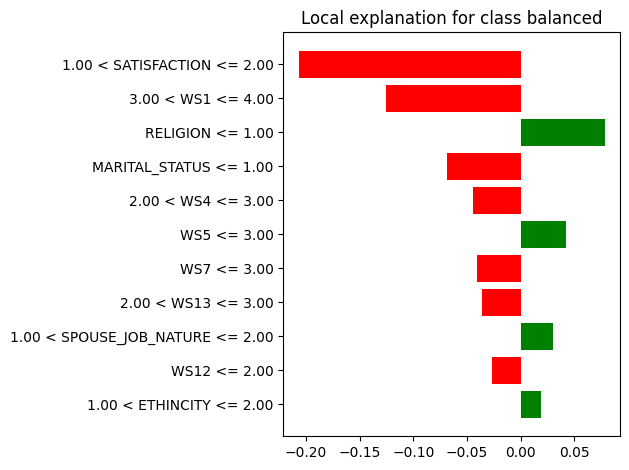

In [91]:
plt=lime_exp_2.as_pyplot_figure()
plt.tight_layout()

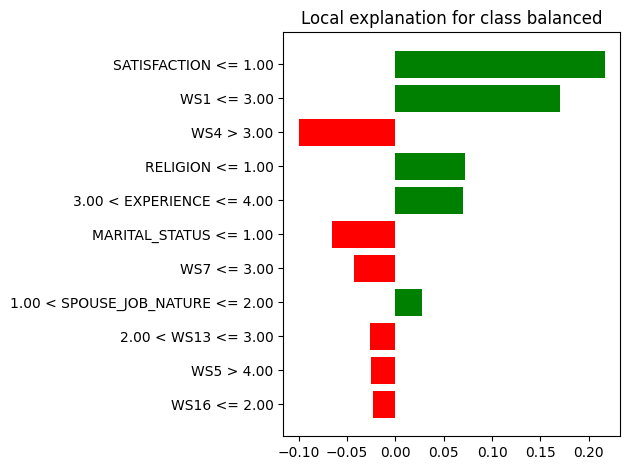

In [92]:
plt=lime_exp_1.as_pyplot_figure()
plt.tight_layout()

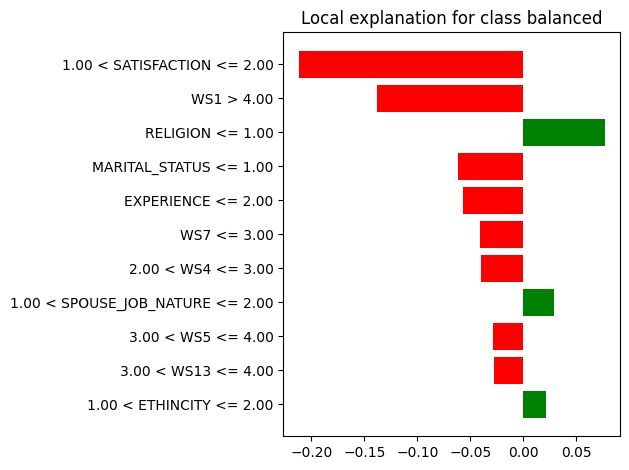

In [79]:
plt=lime_exp.as_pyplot_figure()
plt.tight_layout()

In [127]:
lime_exp_1.show_in_notebook(show_table=True)


In [94]:
lime_exp_2.show_in_notebook(show_table=True)


In [83]:
shap_explainer = shap.TreeExplainer(model_xgb_fit)
shap_values = shap_explainer.shap_values(x_resampled)

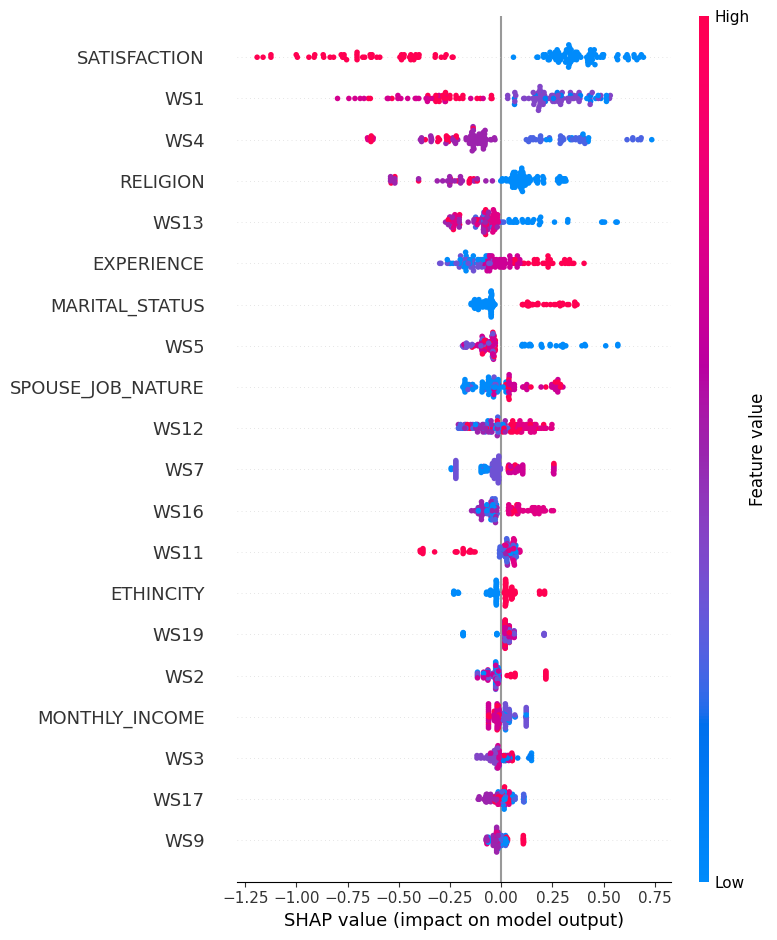

In [84]:
shap.summary_plot(shap_values, x_resampled)

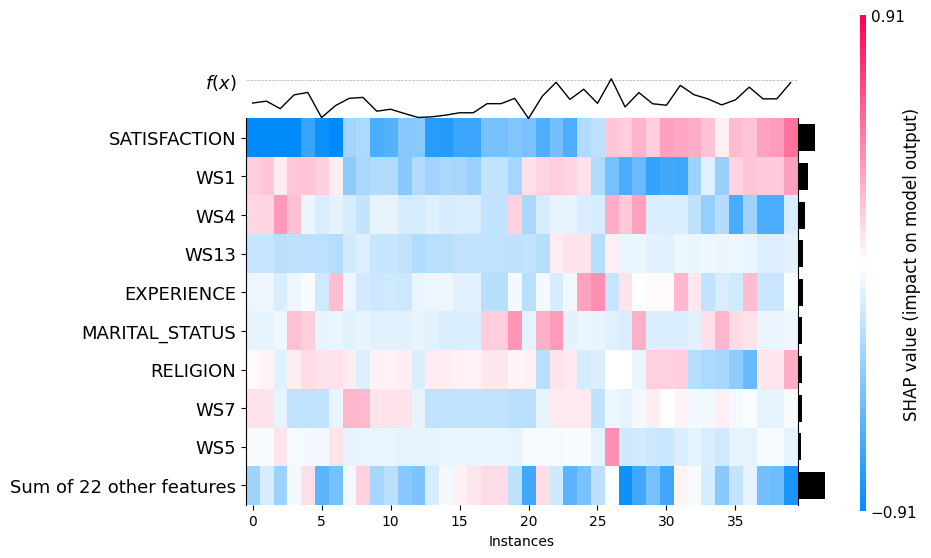

In [85]:
shap_values1 = shap_explainer(x_resampled[:40])
shap.plots.heatmap(shap_values1)

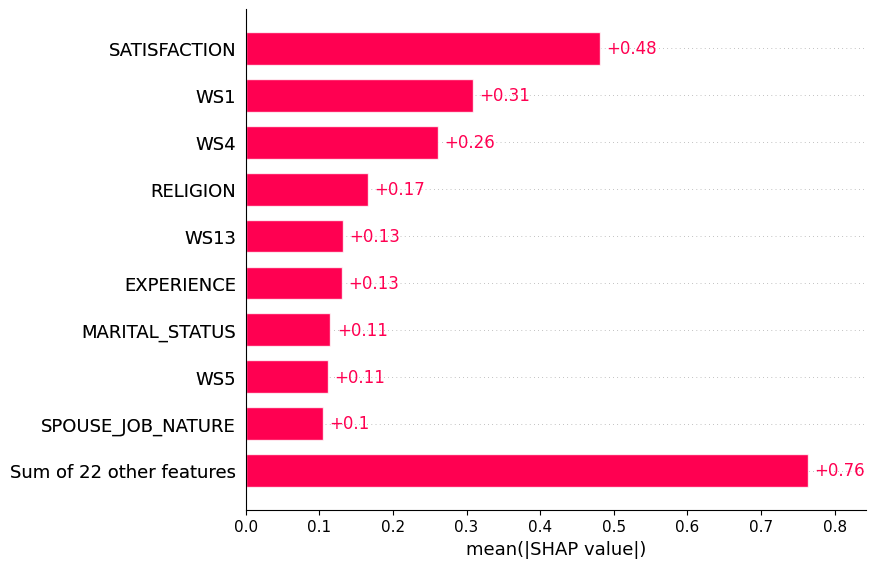

In [86]:
explainer = shap.Explainer(model_xgb_fit)
shap_values = explainer(x_resampled)
shap.plots.bar(shap_values)

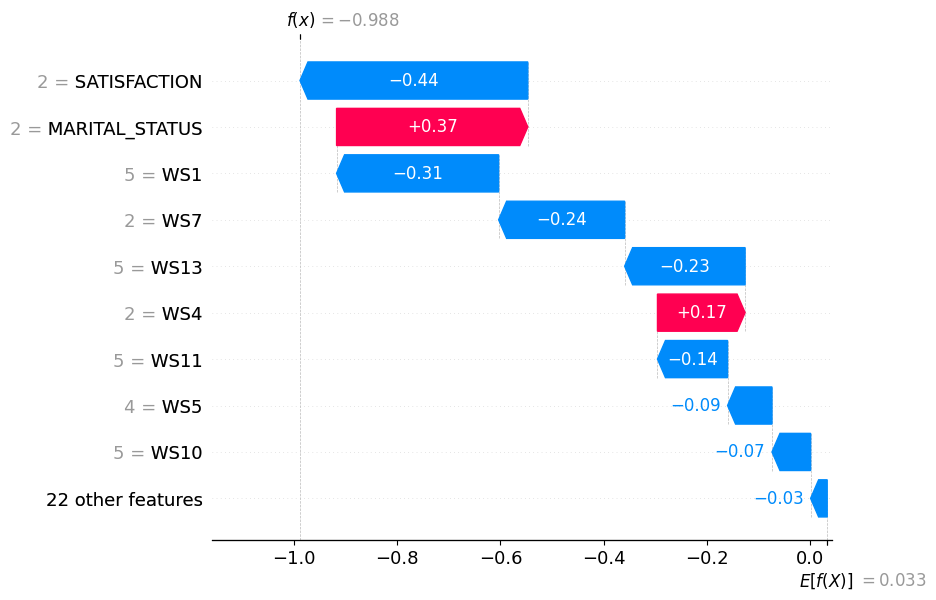

In [91]:
shap_values2 = shap_explainer(x_resampled)
shap.plots.waterfall(shap_values2[25])